<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Drop-columns" data-toc-modified-id="Drop-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop columns</a></span></li><li><span><a href="#Check-Missing-Value" data-toc-modified-id="Check-Missing-Value-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check Missing Value</a></span></li><li><span><a href="#Analytics" data-toc-modified-id="Analytics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analytics</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Sentiment" data-toc-modified-id="Sentiment-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sentiment</a></span><ul class="toc-item"><li><span><a href="#Raw-Data" data-toc-modified-id="Raw-Data-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Raw Data</a></span></li></ul></li></ul></div>

## Import Library

In [1]:
import numpy as np
import pandas as pd 
import re
import pythainlp
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import dict_trie, word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.2

## Load Data

In [2]:
filenames = glob.glob("final/*.csv")

In [3]:
df = pd.DataFrame()

In [4]:
for filename in filenames:
    temp = pd.read_csv(filename)
    company = filename.split("/")[1].split("_")[0]
    temp["company"] = company
    df = df.append(temp,ignore_index = True)

In [5]:
df.head()

,date,time,username,tweet,Food Delivery,Aspect,Sentiment,company
0,2020-08-23,16:30:40,pinkzaa_zaa,ใช้แต่ #LINEMAN มาตลอด\n______________________...,Yes,Company,Positive,LINEMAN
1,2020-08-23,11:29:02,roseapple110,มีคนเจอปัญหาไรเดอร์โทรหาไม่ติดตอนที่ปิดแอปทิ้ง...,Yes,Employee,Negative,LINEMAN
2,2020-08-22,18:58:12,twitneearoi,"เมนูโปรดของแมวอ้วนอย่างเรา วันนี้ขอเสนออออ ""ข้...",No,NaN,NaN,LINEMAN
3,2020-08-22,17:08:50,belloir_sj,ขั้นกว่าของการเลี้ยงหมี คือการอาบน้ำด้วย #แลคต...,No,NaN,NaN,LINEMAN
4,2020-08-22,16:23:15,ifiend_,แต่ #lineman โปรลดเข้าร่วมเยอะกว่านะ,Yes,Price,Positive,LINEMAN


## EDA

### Drop columns

In [6]:
df.drop(columns=["date","time","username"],inplace=True)

### Check Missing Value

In [7]:
np.sum(df.isnull())

tweet               0
Food Delivery       0
Aspect           3339
Sentiment        3340
company             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
np.sum(df.isnull())

tweet            0
Food Delivery    0
Aspect           0
Sentiment        0
company          0
dtype: int64

### Analytics

In [11]:
aspect_counts = (df.groupby(['Aspect'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

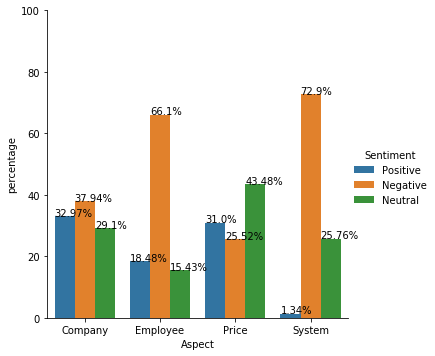

In [12]:
g_1 = sns.catplot(x='Aspect',y='percentage',hue='Sentiment',kind='bar',data=aspect_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Company', 'Employee', 'Price', 'System'])
g_1.ax.set_ylim(0,100)
for p in g_1.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_1.ax.text(txt_x,txt_y,txt)

In [13]:
grab_counts = (df[df['company']=='Grabfood'].groupby(['Aspect'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

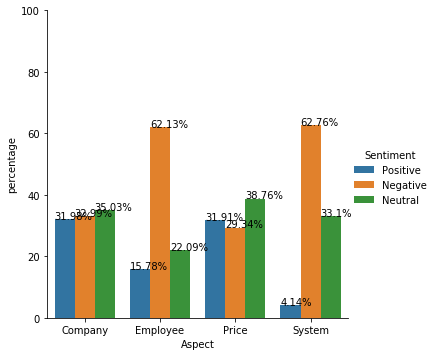

In [14]:
g_2 = sns.catplot(x='Aspect',y='percentage',hue='Sentiment',kind='bar',data=grab_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Company', 'Employee', 'Price', 'System'])
g_2.ax.set_ylim(0,100)
for p in g_2.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_2.ax.text(txt_x,txt_y,txt)

In [15]:
panda_counts = (df[df['company']=='foodpanda'].groupby(['Aspect'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

posx and posy should be finite values
posx and posy should be finite values


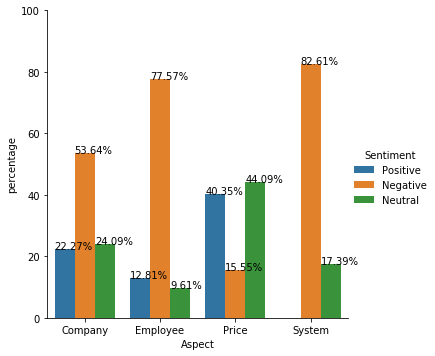

In [16]:
g_3 = sns.catplot(x='Aspect',y='percentage',hue='Sentiment',kind='bar',data=panda_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Company', 'Employee', 'Price', 'System'])
g_3.ax.set_ylim(0,100)
for p in g_3.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_3.ax.text(txt_x,txt_y,txt)

In [17]:
line_counts = (df[df['company']=='LINEMAN'].groupby(['Aspect'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

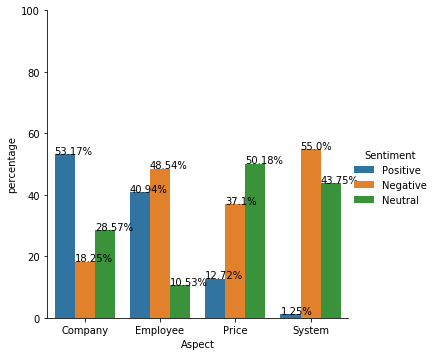

In [18]:
g_4 = sns.catplot(x='Aspect',y='percentage',hue='Sentiment',kind='bar',data=line_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Company', 'Employee', 'Price', 'System'])
g_4.ax.set_ylim(0,100)
for p in g_4.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_4.ax.text(txt_x,txt_y,txt)

In [19]:
employ_counts = (df[df['Aspect']=='Employee'].groupby(['company'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

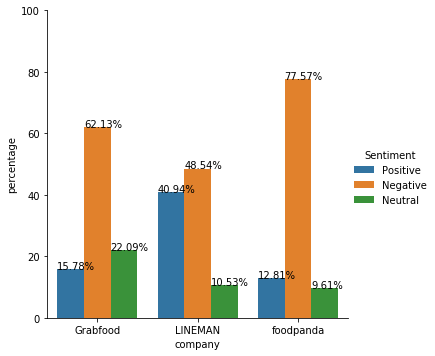

In [20]:
g_5 = sns.catplot(x='company',y='percentage',hue='Sentiment',kind='bar',data=employ_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Grabfood', 'foodpanda', 'LINEMAN'])
g_5.ax.set_ylim(0,100)
for p in g_5.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_5.ax.text(txt_x,txt_y,txt)

In [21]:
system_counts = (df[df['Aspect']=='System'].groupby(['company'])['Sentiment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sentiment'))

posx and posy should be finite values
posx and posy should be finite values


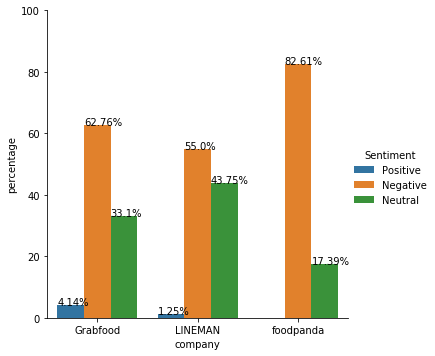

In [22]:
g_6 = sns.catplot(x='company',y='percentage',hue='Sentiment',kind='bar',data=system_counts,
                  hue_order=['Positive', 'Negative', 'Neutral'],
                  col_order=['Grabfood', 'foodpanda', 'LINEMAN'])
g_6.ax.set_ylim(0,100)
for p in g_6.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g_6.ax.text(txt_x,txt_y,txt)

## Preprocessing

In [80]:
## Add word in dict
custom_dict = set(thai_words())

System_ = 'ปิด ปิดร้าน ชั่วคราว ระบบ เงิน ตัด บัตร แคนเซิล ยกเลิก เป็น อาราย อะไร พัง ค้าง ล่ม เสีย สั่ง หา ไม่ได้ เด้ง รอนาน รอ ออเดอร์ พัฒนา ตัดเงิน ตัดบัตร หักเงิน แอป แอพ ปัก ปักหมุด พิกัด ใช้ ยาก ง่าย พัฒนา ไม่ตรง แผนที่ โอน เครดิต คืน รีบ แก้ ด่วน ขัดข้อง ฟื้น แก้ไข จ่ายเงิน ปัญหา ไม่เปิด ไม่เจอ แท็ก คืนเงิน ไม่พบ หา โดนระงับ ตรวจสอบ ขั้นตอน หักตังค์ เงินไม่เข้า เติมเงิน ไม่เข้า จ่ายไม่ได้ แผนที่ แบบใหม่ แบบเก่า แมพ พิกัด บัตรเครดิต บัค ฟีเจอร์ บั๊ก หมุน'
System_Aspect = System_.split(' ')

Company_ = 'คอลเซนเตอร์ คอลเซ็นเตอร์ รับผิดชอบ เบอร์ ติดต่อ สื่อสาร โทร เมล ยกเลิก เงินคืน ร้องเรียน ไม่ สนใจ เพิกเฉย รอสาย ตัดสาย บริการ ด่วน เมล โทร ศูนย์บริการ เจ้าหน้าที่ ปัญหา ชดเชย เลิกใช้ แบน บริษัท โกงเงิน บัญชี เลิกใช้ แคนเซิล ออเดอร์ ลบ องค์กร ระงับ เลิกสั่ง ประทับใจ โกง รีฟัน แนะนำ ชี้แจง แจ้ง รีวิว คอมเพลน'
Company_Aspect = Company_.split(' ')

Price_ =  'ราคา ค่าส่ง ส่วนลด โปรโมชั่น คุ้มค่า ไม่คุ้ม แพง ถูก ลด โปร บอกต่อ คุ้ม ค่าบริการ ใช้ไม่ได้ ใช้งานไม่ได้ คุณภาพ ใช้ได้ ซื้อ ขั้นต่ำ ส่งฟรี แกง บาท ส่วนต่าง ลูกค้า ใหม่ เก่า โค้ด เพิ่ม ฟรี ค่าอาหาร ค่าจอดรถ ต่ำกว่า รหัส ภาษี คำสั่งซื้อ เสียเงินเพิ่ม สังน้อย บวกเพิ่ม ขนาดเล็ก ค่าธรรมเนียม แถม เก็บ เล็ก คูปอง หมด เต็ม กด ทัน'

Price_Aspect = Price_.split(' ')

Employee_ = 'ยกเลิก รอ ช้า นาน ชั่วโมง ชม นาที ไม่ได้รับ ไม่ได้อาหาร ปัญหา รอเพิ่ม ออเดอร์ ผู้ส่ง พนักงาน คนขับ คนส่ง อบรม มารยาท คำพูด รอนาน บริการ นิสัย เละเทะ ไม่รับ สาย ส่ง ไรเดอร์ เสีย คน ติดต่อ ไม่ครบ ขาด หาย ช้า ไม่ครบ คนส่ง พนง สุภาพ นาที ไว ส่ง จัดส่ง ซ้อน ยังไม่ได้ ตั้งแต่ บอกทาง เหวี่ยง ส่งผิด ผิด ปฏิเสธ พี่ พูดเพราะ รับงาน ที่อยู่ หาย คุณ ไม่พอใจ น้อง คุ๊น ด่า เชค เช็ค ตรวจ สภาพ พ่วง ขอบคุณ โทร แซง คิว'

Employee_Aspect = Employee_.split(' ')

reviews_dict = System_Aspect+Company_Aspect+Price_Aspect+Employee_Aspect

for word in reviews_dict:
    custom_dict.add(word)

trie = dict_trie(dict_source= custom_dict)

In [81]:
def preprocessor(text):
    
    #remove hashtag
    hashtag_removed = re.sub(r"#\w+",'', text) 
    
    #remove url
    url_removed = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', hashtag_removed)
    
    #word tokenize
    word_tokenized = pythainlp.word_tokenize(url_removed,custom_dict=trie,keep_whitespace=False,engine='pyicu')
    
    #thai filter
    word_thai = []
    for word in word_tokenized:
        if pythainlp.util.isthai(word):
            for punc in string.punctuation:
                word = word.replace(punc,'')
            if word != '':
                word_thai.append(word)
                
    #check vocab
    check_vocab = []
    for word in word_thai:
        if word in custom_dict:
            check_vocab.append(word)
                
    #remove stopword
    removed_stopword = []
    for word in check_vocab:
        if word not in pythainlp.corpus.common.thai_stopwords():
            removed_stopword.append(word)
    
    
    #remove name of company
    remove_company_name = []
    for word in removed_stopword:
        if word not in ['ฟู้ดแพนด้า','แกรป','แกป','ไลน์แมน','แพนด้า']:
            remove_company_name.append(word)
                
    return remove_company_name

## SVM

In [82]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocessor)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',LinearSVC()),  # train on TF-IDF vectors w/ SVM
])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df[['Aspect', 'Sentiment']], test_size=0.2, random_state=0)

In [84]:
pipeline.fit(X_train, y_train['Aspect'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocessor at 0x1a56d87440>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, int

In [85]:
y_predict = pipeline.predict(X_test)

In [86]:
print(classification_report(y_test['Aspect'],y_predict))
print(confusion_matrix(y_test['Aspect'],y_predict))

              precision    recall  f1-score   support

     Company       0.56      0.48      0.52       110
    Employee       0.74      0.75      0.74       224
       Price       0.85      0.90      0.88       248
      System       0.63      0.62      0.63       106

    accuracy                           0.74       688
   macro avg       0.70      0.69      0.69       688
weighted avg       0.73      0.74      0.74       688

[[ 53  29  11  17]
 [ 23 168  16  17]
 [ 10  11 223   4]
 [  9  20  11  66]]


## Cross validation

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [93]:
y_train_pred_svm = cross_val_predict(pipeline, X_train, y_train['Aspect'], cv=10, n_jobs=-1)
print(classification_report(y_train['Aspect'], y_train_pred_svm))

              precision    recall  f1-score   support

     Company       0.59      0.48      0.53       433
    Employee       0.72      0.80      0.76       891
       Price       0.87      0.92      0.89      1010
      System       0.69      0.59      0.64       418

    accuracy                           0.76      2752
   macro avg       0.72      0.69      0.70      2752
weighted avg       0.75      0.76      0.75      2752



## Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV 
grid_params_svm = {
    'classifier__C': [0.01,0.5,1,1.5],
    'classifier__penalty' :['l1', 'l2']
    }
gs_svm = GridSearchCV(pipeline,grid_params_svm,verbose=1,cv=5,n_jobs=-1)
gs_results_svm = gs_svm.fit(X_train, y_train['Aspect'])
gs_results_svm.best_score_
gs_results_svm.best_estimator_
gs_results_svm.best_params_
best_svm = gs_results_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(confusion_matrix(y_test['Aspect'], y_pred_svm))
print(classification_report(y_test['Aspect'], y_pred_svm))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.8min finished


[[ 54  31  13  12]
 [ 18 178  18  10]
 [  8  10 228   2]
 [  8  21  10  67]]
              precision    recall  f1-score   support

     Company       0.61      0.49      0.55       110
    Employee       0.74      0.79      0.77       224
       Price       0.85      0.92      0.88       248
      System       0.74      0.63      0.68       106

    accuracy                           0.77       688
   macro avg       0.73      0.71      0.72       688
weighted avg       0.76      0.77      0.76       688



## Sentiment

### Raw Data

In [104]:
models_raw = {}
smote = SMOTE()

for aspect in ['Company','Employee','Price','System']:
    
    print('Aspect:', aspect)
    
    pipeline_raw = Pipeline([
        ('bow', CountVectorizer(analyzer=preprocessor)),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier',LinearSVC())])  # train on TF-IDF vectors 
    
    X_train_raw = X_train[y_train['Aspect'] == aspect]
    y_train_raw = y_train['Sentiment'][y_train['Aspect'] == aspect]
    print(len(X_train_raw), len(y_train_raw))
  
    
    pipeline_raw.fit(X_train_raw, y_train_raw)
    models_raw[aspect] = pipeline_raw
    
    y_predict_raw_train = pipeline_raw.predict(X_train_raw)
    y_predict_raw = pipeline_raw.predict(X_test[y_test['Aspect'] == aspect])
    
    print('train')
    print(classification_report(y_train_raw,y_predict_raw_train))
    print(confusion_matrix(y_train_raw,y_predict_raw_train))
    print('\n'*2)
    
    print('test')
    print(classification_report(y_test['Sentiment'][y_test['Aspect'] == aspect],y_predict_raw))
    print(confusion_matrix(y_test['Sentiment'][y_test['Aspect'] == aspect],y_predict_raw))
    print('\n'*2)
    

Aspect: Company
433 433
train
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       157
     Neutral       1.00      0.98      0.99       133
    Positive       0.99      1.00      0.99       143

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433

[[157   0   0]
 [  1 130   2]
 [  0   0 143]]



test
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77        49
     Neutral       0.50      0.48      0.49        25
    Positive       0.81      0.81      0.81        36

    accuracy                           0.72       110
   macro avg       0.69      0.69      0.69       110
weighted avg       0.72      0.72      0.72       110

[[38  8  3]
 [ 9 12  4]
 [ 3  4 29]]



Aspect: Employee
891 891
train
              precision    recall  f1-score   support

    Negative       0.99     

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
models_raw = {}
smote = SMOTE()

for aspect in ['Company','Employee','Price','System']:
    
    print('Aspect:', aspect)
    
    
#     pipeline_raw = Pipeline([
#         ('bow', CountVectorizer(analyzer=preprocessor)),  # strings to token integer counts
#         ('tfidf', TfidfTransformer()), b # integer counts to weighted TF-IDF scores
#         ('classifier',LinearSVC())])  # train on TF-IDF vectors 
    
    X_train_raw = X_train[y_train['Aspect'] == aspect]
    y_train_raw = y_train['Sentiment'][y_train['Aspect'] == aspect]
    print(len(X_train_raw), len(y_train_raw))
    
    vectorizer_vec = CountVectorizer(analyzer=preprocessor)
    X_train_raw_vec = vectorizer_vec.fit_transform(X_train_raw)
    
    vectorizer_tf = TfidfTransformer()
    X_train_raw_tf = vectorizer_tf.fit_transform(X_train_raw_vec)
    
    #Upsampling
    X_train_raw_up, y_train_raw_up = smote.fit_sample(X_train_raw_tf, y_train_raw)
#     print(len(X_train_raw_up), len(y_train_raw_up))
    
    model_raw = LinearSVC()
    model_raw.fit(X_train_raw_up, y_train_raw_up)
    
    
#     pipeline_raw.fit(X_train_raw_up, y_train_raw_up)
    models_raw[aspect] = model_raw
    
    
    X_test_raw_vec = vectorizer_vec.transform(X_test[y_test['Aspect'] == aspect])
    X_test_raw_tf = vectorizer_tf.transform(X_test_raw_vec)
    
    y_predict_raw_train = model_raw.predict(X_train_raw_up)
    y_predict_raw = model_raw.predict(X_test_raw_tf)
    
    print('train')
    print(classification_report(y_train_raw_up,y_predict_raw_train))
    print(confusion_matrix(y_train_raw_up,y_predict_raw_train))
    print('\n'*2)

    print('test')
    print(classification_report(y_test['Sentiment'][y_test['Aspect'] == aspect],y_predict_raw))
    print(confusion_matrix(y_test['Sentiment'][y_test['Aspect'] == aspect],y_predict_raw))
    print('\n'*2)
    

Aspect: Company
433 433


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


train
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       157
     Neutral       1.00      0.98      0.99       157
    Positive       0.98      1.00      0.99       157

    accuracy                           0.99       471
   macro avg       0.99      0.99      0.99       471
weighted avg       0.99      0.99      0.99       471

[[157   0   0]
 [  0 154   3]
 [  0   0 157]]



test
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78        49
     Neutral       0.54      0.56      0.55        25
    Positive       0.81      0.81      0.81        36

    accuracy                           0.74       110
   macro avg       0.71      0.71      0.71       110
weighted avg       0.74      0.74      0.74       110

[[38  8  3]
 [ 7 14  4]
 [ 3  4 29]]



Aspect: Employee
891 891


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


train
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       582
     Neutral       1.00      1.00      1.00       582
    Positive       1.00      0.99      1.00       582

    accuracy                           1.00      1746
   macro avg       1.00      1.00      1.00      1746
weighted avg       1.00      1.00      1.00      1746

[[581   1   0]
 [  0 582   0]
 [  2   1 579]]



test
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86       155
     Neutral       0.33      0.25      0.29        32
    Positive       0.68      0.76      0.72        37

    accuracy                           0.76       224
   macro avg       0.62      0.63      0.62       224
weighted avg       0.75      0.76      0.75       224

[[135  12   8]
 [ 19   8   5]
 [  5   4  28]]



Aspect: Price
1010 1010


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


train
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       441
     Neutral       0.99      0.96      0.98       441
    Positive       0.98      0.99      0.99       441

    accuracy                           0.98      1323
   macro avg       0.98      0.98      0.98      1323
weighted avg       0.98      0.98      0.98      1323

[[439   1   1]
 [  9 424   8]
 [  0   3 438]]



test
              precision    recall  f1-score   support

    Negative       0.68      0.70      0.69        66
     Neutral       0.66      0.64      0.65       106
    Positive       0.66      0.67      0.67        76

    accuracy                           0.67       248
   macro avg       0.67      0.67      0.67       248
weighted avg       0.67      0.67      0.67       248

[[46 13  7]
 [19 68 19]
 [ 3 22 51]]



Aspect: System
418 418


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


train
              precision    recall  f1-score   support

    Negative       1.00      0.99      1.00       310
     Neutral       0.99      1.00      1.00       310
    Positive       1.00      1.00      1.00       310

    accuracy                           1.00       930
   macro avg       1.00      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930

[[308   2   0]
 [  1 309   0]
 [  0   0 310]]



test
              precision    recall  f1-score   support

    Negative       0.77      0.83      0.80        72
     Neutral       0.57      0.48      0.52        33
    Positive       0.00      0.00      0.00         1

    accuracy                           0.72       106
   macro avg       0.45      0.44      0.44       106
weighted avg       0.70      0.72      0.71       106

[[60 12  0]
 [17 16  0]
 [ 1  0  0]]





/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
